In [1]:
# Імпортуємо необхідні бібліотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Завантажуємо датасет
data_path = "data/Telco-Customer-Churn.csv"
df = pd.read_csv(data_path)

# Виводимо перші рядки
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [2]:
# Інформація про дані
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
# Статистичний опис числових колонок
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
# Перевірка на пропущені значення
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


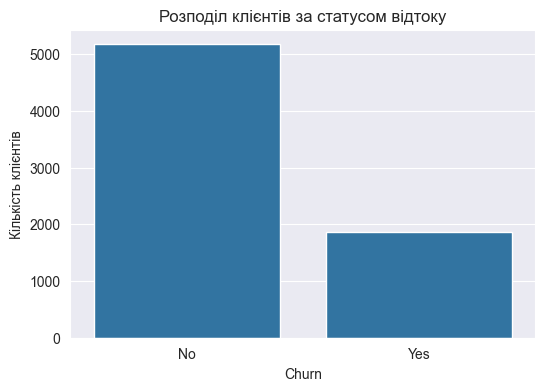

In [5]:
# Припустимо, що колонка з відтоком називається 'Churn'
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn')
plt.title('Розподіл клієнтів за статусом відтоку')
plt.xlabel('Churn')
plt.ylabel('Кількість клієнтів')
plt.show()

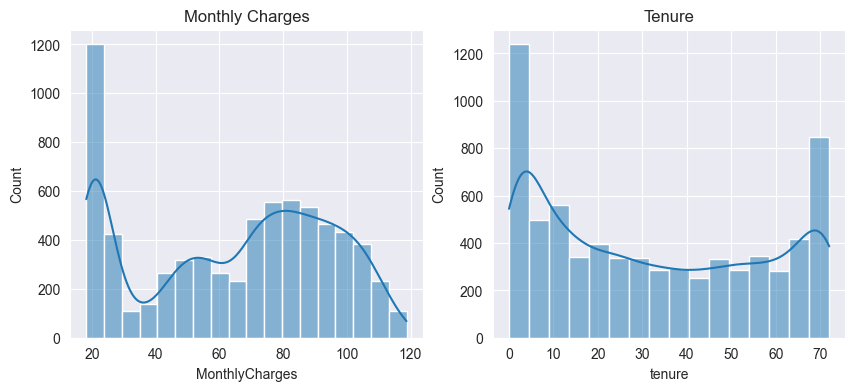

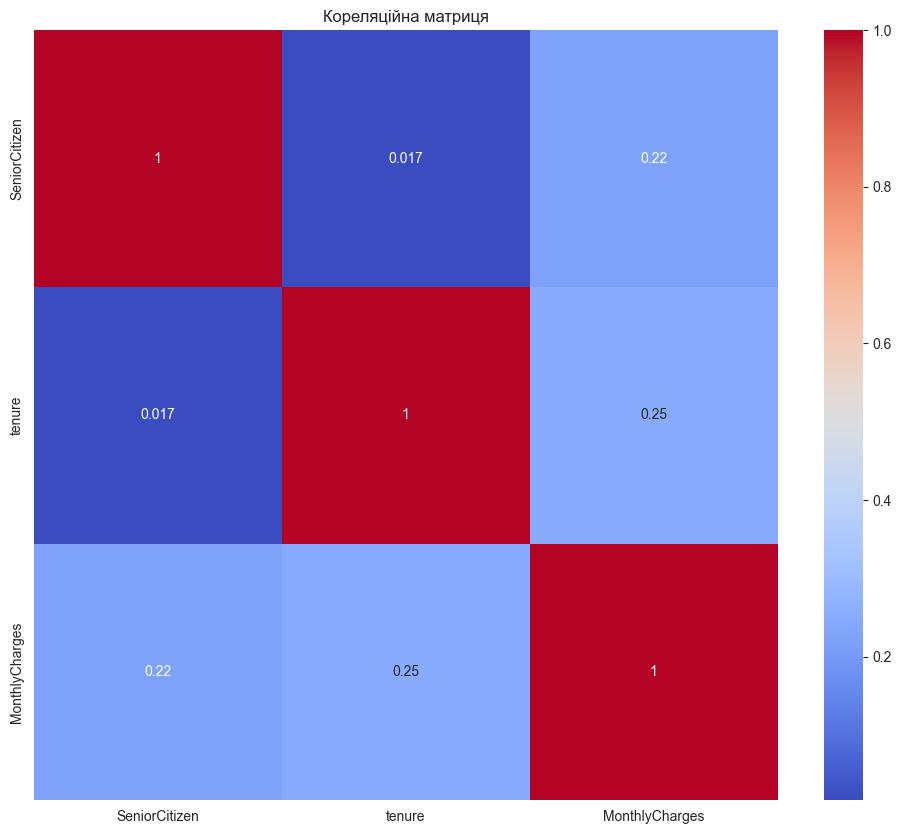

In [6]:
# Розподіл числових змінних
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('Monthly Charges')

plt.subplot(1, 2, 2)
sns.histplot(df['tenure'], kde=True)
plt.title('Tenure')
plt.show()

# Кореляційна матриця
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Кореляційна матриця')
plt.show()

In [7]:
import pandas as pd
import numpy as np

# Припустимо, що дані вже завантажені в датафрейм df (як було зроблено в EDA)
# df = pd.read_csv("data/Telco-Customer-Churn.csv")

# 1. Приведення стовпця TotalCharges до числового типу
# Деякі значення можуть бути пустими або містити пробіли, тому використаємо errors='coerce'
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Заповнимо пропущені значення медіаною (можна також використати mean, але медіана часто краще при наявності викидів)
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# 2. Видалення непотрібних колонок (наприклад, customerID)
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

# 3. Закодування бінарних категорій
# Для бінарних колонок, де є "Yes"/"No", можна застосувати наступний мапінг:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].map({'Yes': 1, 'No': 0})

# Для колонки 'gender' – зазвичай "Male" та "Female"
if 'gender' in df.columns:
    df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# 4. One-hot encoding для багатокласових категоріальних змінних
# Зазвичай це: 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
# 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'
categorical_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaymentMethod']

# Перевіримо, що ці колонки існують у датафреймі, та застосуємо pd.get_dummies
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 5. (Опціонально) Переглянемо оновлену структуру даних
print(df.head())
print(df.info())


   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1           29.85         29.85      0  ...   
1                 0           56.95       1889.50      0  ...   
2                 1           53.85        108.15      1  ...   
3                 0           42.30       1840.75      0  ...   
4                 1           70.70        151.65      1  ...   

   TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0            False                            False            False   
1            False                    

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 1. Розділяємо дані на ознаки (X) та мітку (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# 2. Розділяємо дані на тренувальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Нормалізуємо ознаки за допомогою StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Створюємо нейронну мережу з Keras
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# 5. Компіліруємо модель
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 6. Навчаємо модель
history = model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# 7. Оцінюємо модель на тестовій вибірці
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test accuracy:", accuracy)

2025-02-11 16:10:47.464360: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7366 - loss: 0.5115 - val_accuracy: 0.7950 - val_loss: 0.4204
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7860 - loss: 0.4419 - val_accuracy: 0.7941 - val_loss: 0.4121
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7970 - loss: 0.4250 - val_accuracy: 0.8012 - val_loss: 0.4108
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8064 - loss: 0.4061 - val_accuracy: 0.8030 - val_loss: 0.4093
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8058 - loss: 0.4115 - val_accuracy: 0.7959 - val_loss: 0.4127
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8078 - loss: 0.3985 - val_accuracy: 0.7950 - val_loss: 0.4129
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8151 - loss: 0.4013 - val_accuracy: 0.7986 - val_loss: 0.4133
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8221 - loss: 0.4010 - val_accuracy: 0.

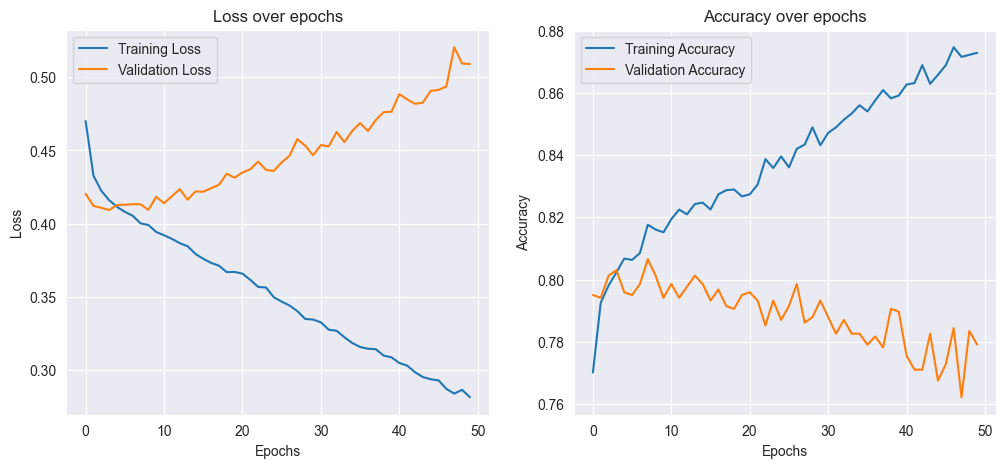

In [9]:
import matplotlib.pyplot as plt

# Припускаємо, що змінна history містить історію навчання
plt.figure(figsize=(12, 5))

# Графік втрат
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1036
           1       0.60      0.47      0.53       373

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



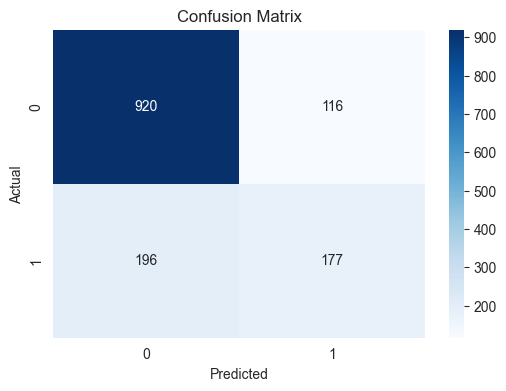

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Прогнозування на тестовій вибірці
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Вивід звіту
print(classification_report(y_test, y_pred))

# Матриця плутанини
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

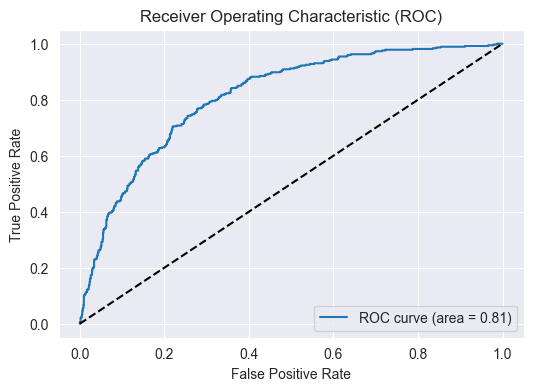

In [11]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Лінія випадкового класифікатора
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Побудова більш складної моделі

model_complex = keras.Sequential([
    # Вхідний шар, розмірність = кількість ознак
    layers.Input(shape=(X_train_scaled.shape[1],)),

    # Перший шар
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Другий шар
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Третій шар
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Четвертий шар
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    # Вихідний шар для бінарної класифікації
    layers.Dense(1, activation='sigmoid')
])

# Компіляція моделі
model_complex.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

# Встановлюємо callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Навчання моделі
history_complex = model_complex.fit(
    X_train_scaled, y_train,
    epochs=100,              # Максимальна кількість епох
    batch_size=32,
    validation_split=0.2,    # 20% даних для валідації
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# Оцінка моделі на тестовій вибірці
loss_complex, accuracy_complex = model_complex.evaluate(X_test_scaled, y_test)
print("Test accuracy (complex model):", accuracy_complex)


Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6127 - loss: 0.7613 - val_accuracy: 0.7799 - val_loss: 0.4736 - learning_rate: 0.0010
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7386 - loss: 0.5584 - val_accuracy: 0.7933 - val_loss: 0.4311 - learning_rate: 0.0010
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7766 - loss: 0.4814 - val_accuracy: 0.7968 - val_loss: 0.4243 - learning_rate: 0.0010
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7731 - loss: 0.4759 - val_accuracy: 0.8021 - val_loss: 0.4225 - learning_rate: 0.0010
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7770 - loss: 0.4701 - val_accuracy: 0.7941 - val_loss: 0.4226 - learning_rate: 0.0010
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7745 - loss: 0.4692 - val_accuracy: 0.8039 - val_loss: 0.4186 - learning_rate: 0.0010
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7817 - loss: 0.

## What I did in this code:

### Model architecture:

Added more layers and increased number of neurons (128, 128, 64, 32), which allows the model to explore more complex dependencies.

BatchNormalization after each layer helps to stabilize learning and speed it up.

Dropout (with coefficients of 0.3 and 0.2) reduces the risk of overtraining by accidentally "disabling" some neurons during training.

### Callbacks:

EarlyStopping stops training if validation loss does not improve during 10 eras, while recovering the best weights.

ReduceLROnPlateau reduces the speed of learning if the validation loss remains at the same level for 5 eras, which can help the model "get out" of the plateau.

### Training:

Used 100 epochs (but thanks to EarlyStopping, training can be completed earlier).

The batch size (batch_size) is set to 32.

a. Building training schedules (loss and accuracy)

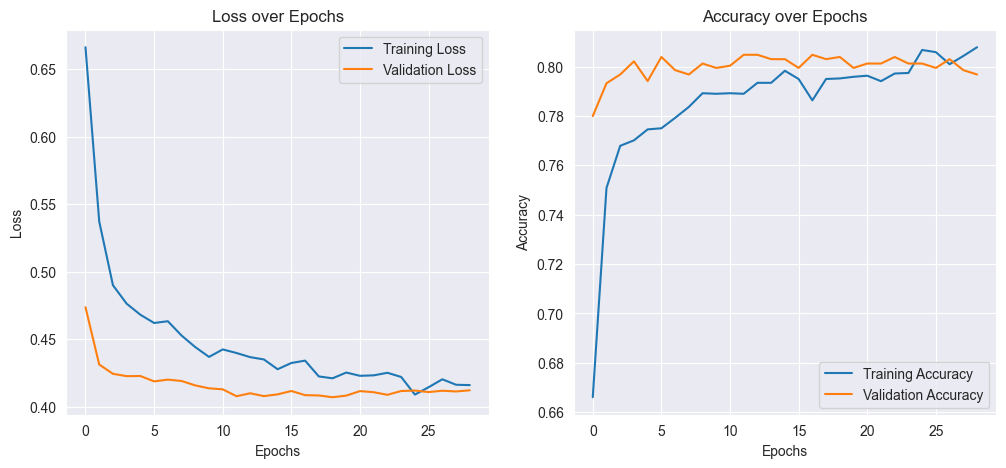

In [16]:
import matplotlib.pyplot as plt

# Припускаємо, що історія навчання збережена в змінній history_complex
plt.figure(figsize=(12, 5))

# Графік втрат (loss)
plt.subplot(1, 2, 1)
plt.plot(history_complex.history['loss'], label='Training Loss')
plt.plot(history_complex.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

# Графік точності (accuracy)
plt.subplot(1, 2, 2)
plt.plot(history_complex.history['accuracy'], label='Training Accuracy')
plt.plot(history_complex.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.show()

b. Calculation of additional metrics: classification report, confusion matrix

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



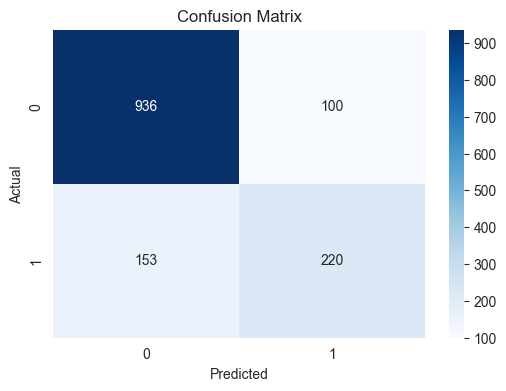

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Отримання прогнозів для тестової вибірки
y_pred_prob = model_complex.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Вивід детального звіту по метрикам
print(classification_report(y_test, y_pred))

# Побудова матриці плутанини
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

c. ROC curve and AUC calculation

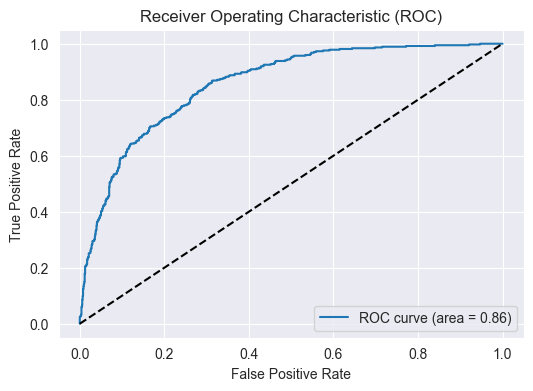

In [18]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # лінія випадкового класифікатора
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [21]:
import keras_tuner as kt
from tensorflow.keras import layers, models

def build_model(hp):
    model = models.Sequential()
    model.add(layers.Input(shape=(X_train_scaled.shape[1],)))

    # Перший шар: можна змінювати кількість нейронів і коефіцієнт dropout
    model.add(layers.Dense(
        units=hp.Int('units_1', min_value=64, max_value=256, step=32),
        activation='relu'
    ))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(rate=hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))

    # Другий шар
    model.add(layers.Dense(
        units=hp.Int('units_2', min_value=32, max_value=128, step=16),
        activation='relu'
    ))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(rate=hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))

    # Вихідний шар
    model.add(layers.Dense(1, activation='sigmoid'))

    # Налаштування optimizer з можливістю зміни learning rate
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Створюємо об’єкт тюнера
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='kt_dir',
    project_name='churn_tuning'
)

# Запускаємо пошук
tuner.search(X_train_scaled, y_train, epochs=50, validation_split=0.2, callbacks=[early_stop, reduce_lr])

# Отримуємо найкращу модель
best_model = tuner.get_best_models(num_models=1)[0]

# Оцінка найкращої моделі
loss_best, accuracy_best = best_model.evaluate(X_test_scaled, y_test)
print("Best model test accuracy:", accuracy_best)

Reloading Tuner from kt_dir/churn_tuning/tuner0.json


/Users/kyivnik/Desktop/PythonProject/.venv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8065 - loss: 0.4144
Best model test accuracy: 0.8126330971717834


In [22]:
import joblib

# Збереження моделі (якщо ще не зроблено)
model_complex.save("churn_model.h5")

# Збереження скейлера
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']